In [1]:
import os
import torch

import numpy as np

import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data

import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from data_utils import get_cifar10

In [2]:
! ls results/checkpoints

DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t12
DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t15
DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t17
DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t19
DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t27
DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t34
DPN92_reswgt(residual_weight=0.65,activation=F.selu)_ckpt.t38
DPN92_reswgt(residual_weight=0.75,activation=F.selu)_ckpt.t16
DPN92_reswgt(residual_weight=0.75,activation=F.selu)_ckpt.t17
DPN92_reswgt(residual_weight=0.75,activation=F.selu)_ckpt.t26
DPN92_reswgt(residual_weight=0.85,activation=F.selu)_ckpt.t14
DPN92_reswgt(residual_weight=0.85,activation=F.selu)_ckpt.t28
DPN92_reswgt(residual_weight=0.85,activation=F.selu)_ckpt.t30
DPN92_reswgt(residual_weight=0.85,activation=F.selu)_ckpt.t31
DPN92_reswgt(residual_weight=0.85,activation=F.selu)_ckpt.t35
DPN92_reswgt(residual_weight=0.85,activation=F.selu)_ckpt.t41
DPN92_re

In [3]:
checkpoint_dir = 'results/checkpoints'
checkpoint_file = 'DPN92_reswgt_both(residual_weight=1.65,activation=F.selu)_ckpt.t17'

# Load checkpoint.
print('==> Resuming from checkpoint..')
checkpoint = torch.load(os.path.join(checkpoint_dir,checkpoint_file))
net = checkpoint['net']
best_acc = checkpoint['acc']
start_epoch = checkpoint['epoch']

==> Resuming from checkpoint..


In [4]:
use_cuda = torch.cuda.is_available()

if use_cuda:
    net.cuda()
    #torch.cuda.set_device(1)
    net = torch.nn.DataParallel(net, device_ids=range(torch.cuda.device_count()))    
    cudnn.benchmark = True

In [5]:
print('==> Preparing data..')
trainset, testset, trainloader, testloader, classes = get_cifar10()

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [6]:
net.eval()

DataParallel(
  (module): DPN_reswgt_both(
    (conv1): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (layer1): Sequential(
      (0): Bottleneck_reswgt_both(
        (conv1): Conv2d (64, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
        (conv2): Conv2d (96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
        (conv3): Conv2d (96, 272, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(272, eps=1e-05, momentum=0.1, affine=True)
        (shortcut): Sequential(
          (0): Conv2d (64, 272, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(272, eps=1e-05, momentum=0.1, affine=True)
        )
      )
      (1): Bottleneck_reswgt_both(
        (conv1): Conv2d (288, 

In [11]:
counter = 0
originals = []
predictions = []
labels = []
for batch_idx, (inputs, targets) in enumerate(testloader):
    if use_cuda:
        inputs, targets = inputs.cuda(), targets.cuda()
    inputs, targets = Variable(inputs, volatile=True), Variable(targets)
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    originals.append(inputs)
    predictions.append(predicted)
    labels.append(targets.data)
    counter +=1
    if counter > 3:
        break

In [17]:
print(len(predictions[0]),len(labels[0]))

100 100


In [44]:
#labels[0]

In [21]:
correct = predictions[0].eq(labels[0]).sum(); correct

84

In [25]:
!ls ../data

DataExploration1.ipynb	raw			       train7_5K.txt
cifar-10-batches-py	test7.txt		       train7m.txt
cifar-10-python.tar.gz	test7_1_5k.txt		       train7s.txt
cifar10			test7_1_5k_t3k.txt	       valid7.txt
eng-fra.txt		test7_1_5k_t4k.txt	       valid7_1_5k.txt
eng.testa		test7_1_5k_t5k.txt	       valid7_1_5k_t3k.txt
eng.testb		test7_2K.txt		       valid7_1_5k_t4k.txt
eng.train		test7m.txt		       valid7_1_5k_t5k.txt
g7reform.txt		test7s.txt		       valid7_2k.txt
googconllformat3.txt	train7.txt		       valid7m.txt
googconllformat7.txt	train7_3k.txt		       valid7s.txt
names			train7_4k.txt
processed		train7_5K (Case Conflict).txt


In [ ]:
for batch_idx, (inputs, targets) in enumerate(testloader):
    if use_cuda:
        inputs, targets = inputs.cuda(), targets.cuda()
    inputs, targets = Variable(inputs, volatile=True), Variable(targets)
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += targets.size(0)
    correct += predicted.eq(targets.data).cpu().sum()
    preds 

In [28]:
# Data
transform_train = transforms.Compose([
    #transforms.RandomCrop(size, padding=0) 
    # size = 32 means square crop of 32, 32 # padding 4 = all 4 borders
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # Horizontally flip image randomly with a probability of 0.5.
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean, std) # normalize each channel of the input
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

basic_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

print('==> Preparing data..')
data_location = '../data'

#trainset = dsets.CIFAR10(root='./data', train=True, download=True)
trainset_trans1 = torchvision.datasets.CIFAR10(root=data_location, train=True, download=True, transform=transform_train)
trainset_trans2 = torchvision.datasets.CIFAR10(root=data_location, train=True, download=False, transform=basic_transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
trainloader_trans1 = torch.utils.data.DataLoader(trainset_trans1, batch_size=64, shuffle=True, num_workers=2)
trainloader_trans2 = torch.utils.data.DataLoader(trainset_trans2, batch_size=64, shuffle=True, num_workers=2)

#testset = dsets.CIFAR10(root='./data', train=False, download=True)
testset_trans1 = torchvision.datasets.CIFAR10(root=data_location, train=False, download=True, transform=transform_test)
testset_trans2 = torchvision.datasets.CIFAR10(root=data_location, train=False, download=False, transform=basic_transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False, num_workers=2)
testloader_trans1 = torch.utils.data.DataLoader(testset_trans1, batch_size=50, shuffle=False, num_workers=2)
testloader_trans2 = torch.utils.data.DataLoader(testset_trans2, batch_size=50, shuffle=False, num_workers=2)
print('Done')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
Done


In [55]:
batch_size = 16
# Data Loader (Input Pipeline)
train_loader2 = torch.utils.data.DataLoader(dataset=trainset_trans2,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader2 = torch.utils.data.DataLoader(dataset=testset_trans2,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [56]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes_dict = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [57]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter2 = iter(train_loader2)
images2, labels2 = dataiter2.next()

    truck      ship      ship      ship     plane      deer       car       dog      ship     horse


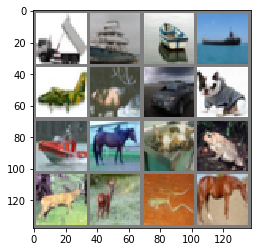

In [61]:
# show images
imshow(torchvision.utils.make_grid(images2,nrow=4))
# print labels
print(' '.join('%9s' % classes[labels2[j]] for j in range(10)))

In [62]:
test_images = images2
if use_cuda:
    inputs, targets = test_images.cuda(), labels2.cuda()
    inputs, targets = Variable(inputs, volatile=True), Variable(targets)
model_on_images = net(inputs)
_, predicted = torch.max(model_on_images.data, 1)

In [66]:
class_preds = [classes_dict[x] for x in predicted]
print(class_preds[0:4])
print(class_preds[4:8])
print(class_preds[8:12])
print(class_preds[12:16])

['ship', 'bird', 'ship', 'ship']
['plane', 'deer', 'deer', 'cat']
['ship', 'horse', 'dog', 'cat']
['deer', 'deer', 'cat', 'dog']
